In [1]:
import numpy as np
import h5py
import os

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import matplotlib as mpl
mpl.rcParams['font.size']=16
mpl.rcParams['font.serif'] = "Bitstream Vera Serif"
mpl.rcParams['font.family'] = "serif"

from numpy import polyfit, polyval
from numpy.polynomial.legendre import legfit, legval

In [2]:

def normalize(d):
    x=d.copy()
    x-=x.min()
    return x/(x.max()-x.min())

In [298]:
run_num = 111
f=h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/kmeans_clusters/gai/pca10_kmeans15/run%d_clustered_shots.h5'%run_num,'r')
qidx=30
print f['q%d'%qidx].keys()

asym_kmeans=f['q%d'%qidx]['asym'].value
asym_rank = np.argsort(asym_kmeans)[::-1]


cali_f=h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/kmeans_clusters/cali_gai/pca10_kmeans15/run%d_clustered_shots.h5'%run_num,'r')
print f['q%d'%qidx].keys()

asym_kmeans=cali_f['q%d'%qidx]['asym'].value
cali_asym_rank = np.argsort(asym_kmeans)[::-1]


phi_offset = 15

num_phi = 326
qvalue = np.load('/reg/neh/home/qiaoshen/run16_notebooks/encodeZ400_qvalue.npy')[10:33]
exp_cpsi = np.load('/reg/neh/home/qiaoshen/run16_notebooks/encodeZ400_cpsi.npy')[10:33,phi_offset:num_phi/2-phi_offset]

[u'asym', u'ave_clus_cor', u'ave_cor', u'clus_nshots', u'norm_shots_0', u'norm_shots_1', u'norm_shots_10', u'norm_shots_11', u'norm_shots_12', u'norm_shots_13', u'norm_shots_14', u'norm_shots_2', u'norm_shots_3', u'norm_shots_4', u'norm_shots_5', u'norm_shots_6', u'norm_shots_7', u'norm_shots_8', u'norm_shots_9']
[u'asym', u'ave_clus_cor', u'ave_cor', u'clus_nshots', u'norm_shots_0', u'norm_shots_1', u'norm_shots_10', u'norm_shots_11', u'norm_shots_12', u'norm_shots_13', u'norm_shots_14', u'norm_shots_2', u'norm_shots_3', u'norm_shots_4', u'norm_shots_5', u'norm_shots_6', u'norm_shots_7', u'norm_shots_8', u'norm_shots_9']


In [299]:
print cali_asym_rank
print asym_rank

[13  2  3  4  8  7  0 10  6 14  9 12 11  5  1]
[ 8  6  4 14  1 10 12  0  7 11 13  2  5  9  3]


In [300]:
print exp_cpsi.shape
f['q%d'%qidx]['ave_clus_cor'][9].shape

(23, 133)


(326,)

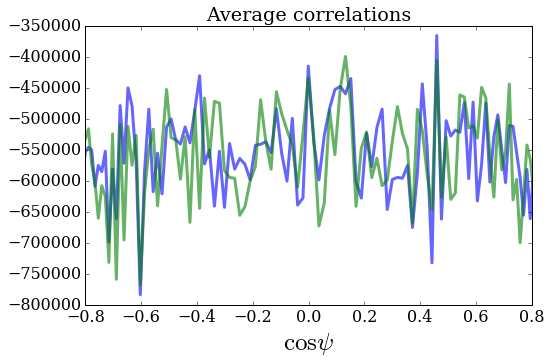

In [301]:
plt.figure(figsize=[8,5])

plt.plot(exp_cpsi[qidx-10],f['q%d'%qidx]['ave_cor'][phi_offset:num_phi/2-phi_offset], 
         linewidth=3, alpha=0.6, color='b')
plt.plot(exp_cpsi[qidx-10],cali_f['q%d'%qidx]['ave_cor'][phi_offset:num_phi/2-phi_offset], 
         linewidth=3, alpha=0.6, color='g')
plt.xlim(-0.8,0.8)
plt.title('Average correlations')
plt.xlabel('$\cos{\psi}$', fontsize=25)

4 3


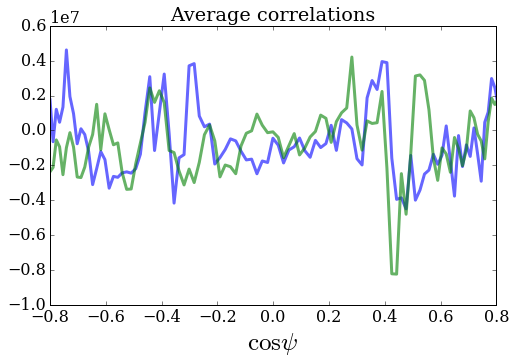

In [324]:
plt.figure(figsize=[8,5])
ii=2
plt.plot(exp_cpsi[qidx-10],f['q%d'%qidx]['ave_clus_cor'][asym_rank[ii],phi_offset:num_phi/2-phi_offset], 
         linewidth=3, alpha=0.6, color='b')
plt.plot(exp_cpsi[qidx-10],cali_f['q%d'%qidx]['ave_clus_cor'][cali_asym_rank[ii],phi_offset:num_phi/2-phi_offset], 
         linewidth=3, alpha=0.6, color='g')
plt.xlim(-0.8,0.8)
plt.title('Average correlations')
plt.xlabel('$\cos{\psi}$', fontsize=25)
print asym_rank[ii], cali_asym_rank[ii]

In [325]:
print asym_rank[ii], cali_asym_rank[ii]

4 3


In [326]:

f_eig=h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/kmeans_clusters/gai/pca10_kmeans15/run%d_eigenimages.h5'%run_num,'r')
eigs = f_eig['q%d'%qidx]['k%d'%asym_rank[ii]]['pca_components'].value
cor = f_eig['q%d'%qidx]['k%d'%asym_rank[ii]]['pca3'][0, phi_offset:num_phi/2-phi_offset]
cali_f_eig=h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/kmeans_clusters/cali_gai/pca10_kmeans15/run%d_eigenimages.h5'%run_num,'r')
cali_eigs = cali_f_eig['q%d'%qidx]['k%d'%cali_asym_rank[ii]]['pca_components'].value
cali_cor = cali_f_eig['q%d'%qidx]['k%d'%cali_asym_rank[ii]]['pca3'][0, phi_offset:num_phi/2-phi_offset]

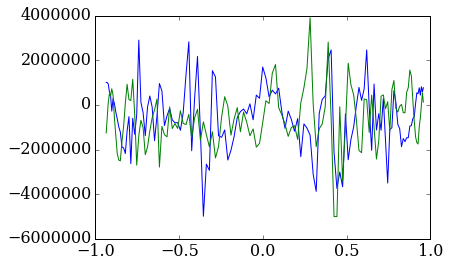

In [327]:
plt.plot(exp_cpsi[qidx-10],cor)
plt.plot(exp_cpsi[qidx-10],cali_cor)

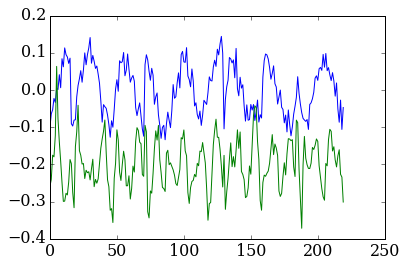

In [328]:
nn = 0

plt.plot(eigs[nn])
plt.plot(cali_eigs[nn]-0.2)

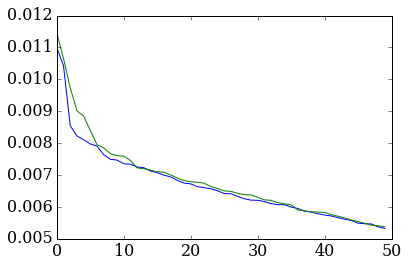

In [329]:
plt.plot(f_eig['q%d'%qidx]['k%d'%asym_rank[ii]]['explained_variance_ratio'].value)
plt.plot(cali_f_eig['q%d'%qidx]['k%d'%asym_rank[ii]]['explained_variance_ratio'].value)